 Write a function of your own to carry out histogram equalization on the image shown in Fig. 5. Show the
histograms before and after equalization. 

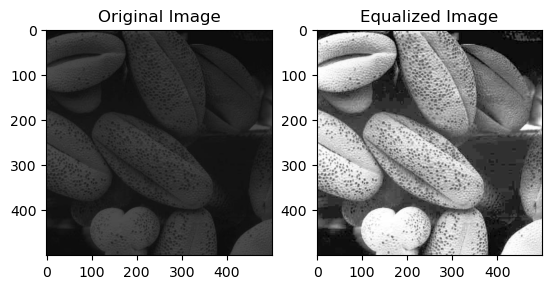

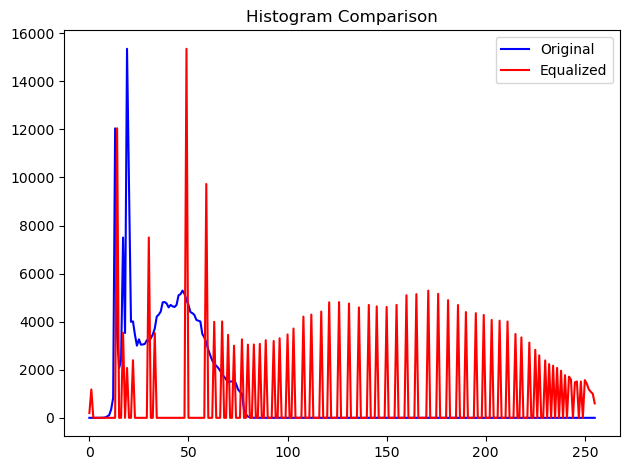

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

def histogram_equalization(image):
    # Convert the image to grayscale if it's in color
    if len(image.shape) == 3:
        gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    else:
        gray_image = image.copy()
    
    # Apply histogram equalization
    equalized_image = cv.equalizeHist(gray_image)
    
    return equalized_image

# Load the original image
img_orig = cv.imread('images\en3160_assignment_01_Page_3_Image_0001.jpg', cv.IMREAD_COLOR)

# Convert the image to grayscale for histogram equalization
img_gray = cv.cvtColor(img_orig, cv.COLOR_BGR2GRAY)

# Perform histogram equalization
img_equalized = histogram_equalization(img_gray)

# Create subplots
f, axarr = plt.subplots(1, 2)

# Display the original and equalized images
axarr[0].imshow(cv.cvtColor(img_gray, cv.COLOR_BGR2RGB))
axarr[0].set_title("Original Image")

axarr[1].imshow(img_equalized, cmap='gray')
axarr[1].set_title("Equalized Image")

# Plot histograms
hist_orig = cv.calcHist([img_gray], [0], None, [256], [0, 256])
hist_equalized = cv.calcHist([img_equalized], [0], None, [256], [0, 256])

plt.figure()
plt.plot(hist_orig, color='b', label='Original')
plt.plot(hist_equalized, color='r', label='Equalized')
plt.title("Histogram Comparison")
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()
